In [18]:
#importing relevant packages
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [19]:
#importing data as csv
df = pd.read_csv('C:/Users/samdk/Desktop/data science/nfl/2022_draft.csv')


In [20]:
#limiting players to be ranked in tiers to the draft pool

teams=10
roster_spots = 16
draft_pool = teams*roster_spots
df = df[:draft_pool]

In [23]:
#viewing finalized data
print(df.shape)
df.head()

(160, 7)


,RK,Player,Team,Position,AVG,Min,Max
0,1,Christian McCaffrey,CAR,RB,1.2,1.0,2.0
1,2,Jonathan Taylor,IND,RB,2.0,1.0,3.0
2,3,Austin Ekeler,LAC,RB,4.4,2.0,7.0
3,4,Dalvin Cook,MIN,RB,5.4,4.0,7.0
4,5,Justin Jefferson,MIN,WR,6.0,3.0,10.0


In [22]:
#removing what looks to be an added index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [31]:
#finding silhouette score (how similar an object is to its cluster compaed to other clusters)
avgs = []
clusters=[]
start = 2 
stop = 35

for n_clusters in range(start, stop):
    X=df[['AVG']].values
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    labels = model.predict(X)
    silhouette_avg = silhouette_score(X, labels)
    avgs.append(silhouette_avg)
    clusters.append(n_clusters)

In [36]:
#dataframe of cluster # vs. silhouette score
cluster_df = pd.DataFrame(list(zip(clusters, avgs)), columns = ['Clusters', 'Silhouette Score'])
cluster_df.head(35)

,Clusters,Silhouette Score
0,2,0.620715
1,3,0.604692
2,4,0.558349
3,5,0.585659
4,6,0.577524
5,7,0.565881
6,8,0.575688
7,9,0.573874
8,10,0.575533
9,11,0.574988


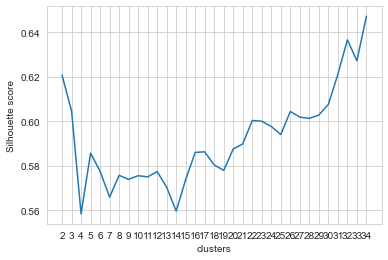

In [35]:
#plot of clusters vs. sihouette score
plt.plot(np.arange(start, stop, 1), avgs);
plt.xlabel('clusters');
plt.ylabel('Silhouette score');
plt.xticks(np.arange(start, stop, 1));

In [ ]:
#13, 16, 17 are good candidates for number of clusers, 5 is too few, anything more than 20 is too many

In [41]:
# on to Kmeans cluserint for tiers
k=17
model = KMeans(n_clusters=k)
model.fit(X)
labels = model.predict(X)
def make_tiers(labels):
    unique_labels = []
    tiers = []
    for label in labels:
        if label not in unique_labels:
            unique_labels.append(label)
        tiers.append(
            len(set(unique_labels))
        )
    return tiers
tiers = make_tiers(labels)
df['Tier']=tiers

In [48]:
#dataframe with tiers!
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head(200)

,RK,Player,Team,Position,AVG,Min,Max,Tier
0,1,Christian McCaffrey,CAR,RB,1.2,1.0,2.0,1
1,2,Jonathan Taylor,IND,RB,2.0,1.0,3.0,1
2,3,Austin Ekeler,LAC,RB,4.4,2.0,7.0,1
3,4,Dalvin Cook,MIN,RB,5.4,4.0,7.0,1
4,5,Justin Jefferson,MIN,WR,6.0,3.0,10.0,1
5,6,Cooper Kupp,LAR,WR,7.0,3.0,10.0,1
6,7,Najee Harris,PIT,RB,8.6,4.0,12.0,1
7,8,Ja'Marr Chase,CIN,WR,8.8,4.0,11.0,1
8,9,D'Andre Swift,DET,RB,9.4,5.0,12.0,1
9,10,Joe Mixon,CIN,RB,10.0,8.0,12.0,2
